In [823]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

### Starting from the working dataset

In [824]:
wdf = pd.read_csv('train.csv')
wdf.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,5,40205.0
1,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,18-24 years old,Man,No,Straight / Heterosexual,European,None of the above,None of the above,NaN,2,60307.0
2,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,Engineering manager,20 to 99 employees,United States of America,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",14.0,10,194400.0
3,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",2 to 9 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,65000.0
4,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,110000.0


- Education column

In [825]:
# before processing
wdf["Education"].unique()

array(['Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', nan], dtype=object)

In [826]:
wdf['Education'] = wdf['Education'].str.replace('â€™', '\'')

# function from https://www.kaggle.com/code/soheiltehranipour/stackoverflow-2022-salary-prediction
def clean_education(x):
    if pd.isna(x):
        return x
    if 'Bachelor\'s degree' in x:
        return 'Bachelor\'s degree'
    if 'Master\'s degree' in x:
        return 'Master\'s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelor\'s'

wdf['Education'] = wdf['Education'].apply(clean_education)


In [827]:
# after processing
wdf["Education"].unique()

array(["Master's degree", "Bachelor's degree", "Less than a Bachelor's",
       'Post grad', nan], dtype=object)

- Remote Work

In [828]:
# before processing
wdf['Remote_work'].unique()

array(['Hybrid (some remote, some in-person)', 'Fully remote',
       'Full in-person', nan], dtype=object)

In [829]:
wdf['Remote_work'] = wdf['Remote_work'].map(lambda x: x.replace('Fully remote', 'remote').replace('Hybrid (some remote, some in-person)', 'hybrid').replace('Full in-person', 'in-person') if isinstance(x, str) else x)
wdf.dropna(subset=['Remote_work'], inplace=True)

In [830]:
# after processing
wdf['Remote_work'].unique()

array(['hybrid', 'remote', 'in-person'], dtype=object)

- Coding as hobby:

In [831]:
# before processing
wdf['Coding_as_hobby'].unique()

array(['Hobby', 'I donâ€™t code outside of work',
       'Hobby;Contribute to open-source projects;Freelance/contract work',
       'Hobby;Freelance/contract work',
       'Hobby;Contribute to open-source projects',
       'Hobby;Bootstrapping a business',
       'Hobby;Contribute to open-source projects;Bootstrapping a business',
       'Other (please specify):',
       'Hobby;Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Bootstrapping a business', 'Hobby;Other (please specify):',
       'Contribute to open-source projects',
       'Hobby;Bootstrapping a business;Freelance/contract work',
       'Freelance/contract work',
       'Hobby;Contribute to open-source projects;Other (please specify):',
       'Contribute to open-source projects;Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business',
       'Hobby

In [832]:
def hobbyfinder(value):
    if 'hobby' in str(value.lower()):
        return 'yes'
    else:
        return 'no'

wdf['Coding_as_hobby'] = wdf['Coding_as_hobby'].astype(str).apply(hobbyfinder)

In [833]:
# after processing
wdf['Coding_as_hobby'].unique()

array(['yes', 'no'], dtype=object)

- Certifications (Note: actually these values are not certification number, there are just famous platforms. Hence better to filter like 'Yes'/'No'):

In [834]:
wdf['Certifications'].unique()

array([nan, 'Coursera;Udemy;Codecademy;edX;Udacity',
       'Coursera;Udemy;Pluralsight;edX', 'Coursera;Udemy;Udacity',
       'Udemy', 'Codecademy', 'Coursera;Udemy;edX', 'Pluralsight',
       'Codecademy;Pluralsight', 'Udemy;Codecademy;Pluralsight',
       'Udemy;Pluralsight', 'Pluralsight;Udacity', 'Coursera;Udemy;Other',
       'Coursera', 'Udemy;Codecademy', 'Udemy;Pluralsight;Udacity',
       'Other', 'Coursera;Pluralsight', 'Coursera;Udemy',
       'Coursera;Codecademy', 'Coursera;Other',
       'Udemy;Codecademy;Pluralsight;edX;Udacity', 'Coursera;Udacity',
       'Coursera;Codecademy;edX;Other', 'Codecademy;Skillsoft',
       'Coursera;Udemy;Codecademy;Pluralsight', 'Udemy;Codecademy;Other',
       'edX', 'Coursera;Udemy;Codecademy;Pluralsight;edX;Udacity',
       'Pluralsight;Other', 'Codecademy;Other',
       'Coursera;Udemy;Codecademy;edX', 'Coursera;Codecademy;Other',
       'Coursera;Udemy;Pluralsight',
       'Udemy;Codecademy;Pluralsight;Skillsoft', 'Coursera;edX',
    

In [835]:
def certification_status(x):
    if pd.isnull(x):
        return 'no'
    else:
        return 'yes'

wdf['Certifications'] = wdf['Certifications'].apply(certification_status)

In [836]:
# after processing
wdf['Certifications'].unique()

array(['no', 'yes'], dtype=object)

- Physical dissabilities (Note: for physical only 2547 responses, hence 'yes'/'no' binary system applied again + 'Prefer not to say')

In [837]:
# before processing
wdf['Physical_disability'].unique()

array(['None of the above', nan, 'I am deaf / hard of hearing',
       'Prefer not to say', 'I am blind / have difficulty seeing',
       'Or, in your own words:',
       'I am unable to / find it difficult to walk or stand without assistance',
       'I am deaf / hard of hearing;I am unable to / find it difficult to walk or stand without assistance',
       'I am unable to / find it difficult to type',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'Or, in your own words:;I am unable to / find it difficult to walk or stand without assistance',
       'Or, in your own words:;I am deaf / hard of hearing',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing;I am unable to / find it difficult to walk or stand without assistance',
       'I am unable to / find it difficult to type;I am unable to / find it difficult to walk or stand without assistance',
       'Or, in your own words:;I am blind / have difficulty seeing',
       'I am dea

In [838]:
# number of rows with 'Prefer not to say' VS total number of rows
print(wdf['Physical_disability'].value_counts().sum())
print(wdf[wdf['Physical_disability'] == 'Prefer not to say'].value_counts().sum())

25561
211


In [839]:
def physical_disability(x):
    if pd.isnull(x) or x == 'None of the above':
        return 'no' # imputing missing values as 'no' since it is the most common
    if x == 'Prefer not to say':
        return x
    else:
        return 'yes'

wdf['Physical_disability'] = wdf['Physical_disability'].apply(physical_disability)

In [840]:
# after processing
wdf['Physical_disability'].unique()

array(['no', 'yes', 'Prefer not to say'], dtype=object)

- Mental dissability (Note: here we have 16,163 responses, hence we should distinguish among dissabilities):

In [841]:
# before processing
wdf['Mental_disability'].unique()

array(['I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder',
       'None of the above',
       'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
       'I have an anxiety disorder', nan,
       'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
       'I have an anxiety disorder;I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
       'Prefer not to say',
       "I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have learning differences (e.g., Dyslexic, Dyslexia, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       "I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       'I have an anxiety disorder;Or, in your own words:',
       "I have a mood or emotional dis

In [842]:
def simplify_mental_disability(x):
    if pd.isnull(x) or x == 'None of the above':
        return 'No'
    categories = {
        'I have a concentration and/or memory disorder': 'Memory_disorder',
        'I have an anxiety disorder': 'Anxiety_disorder',
        'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)': 'Mood_disorder',
        "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)": 'Autism',
        'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)': 'Learning_difficulties'
    }
    matches = [cat for keyword, cat in categories.items() if keyword in x]
    if len(matches) > 1:
        return 'Various_disabilities'
    elif len(matches) == 1:
        return matches[0]
    else:
        return 'Others'

wdf['Mental_disability'] = wdf['Mental_disability'].apply(simplify_mental_disability)


In [843]:
# after processing
wdf['Mental_disability'].value_counts()

No                       19224
Various_disabilities      2477
Memory_disorder           1193
Others                    1172
Anxiety_disorder          1039
Mood_disorder              789
Autism                     391
Learning_difficulties      323
Name: Mental_disability, dtype: int64

- Company Size

In [844]:
wdf['Company_size'].unique()

array(['20 to 99 employees', '100 to 499 employees', '2 to 9 employees',
       '5,000 to 9,999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10,000 or more employees', '500 to 999 employees',
       '1,000 to 4,999 employees', 'I donâ€™t know', '10 to 19 employees',
       nan], dtype=object)

In [845]:
# Preprocess OrgSize column, soruce: https://www.kaggle.com/code/do1likethis/which-devs-get-paid-more-and-why#Modeling:-how-well-can-we-predict-earning?-What-variables-matter-most?

wdf['Company_size'] = wdf['Company_size'].fillna("None").replace({"10,000 or more employees": "XL",
                                      "20 to 99 employees": "S",
                                      "100 to 499 employees": "M",
                                      "1,000 to 4,999 employees": "L",
                                      "5,000 to 9,999 employees": "XL",
                                      "2 to 9 employees": "XS",
                                      "10 to 19 employees": "XS",
                                      "500 to 999 employees": "M",
                                      "Just me - I am a freelancer, sole proprietor, etc.": "XS",
                                      "I donâ€™t know": "None",
                                      "I prefer not to answer": "None"})

wdf['Company_size'] = wdf['Company_size'].replace('None', np.nan)

In [846]:
# after processing
wdf['Company_size'].unique()

array(['S', 'M', 'XS', 'XL', 'L', nan], dtype=object)

- Age (Note: Only check NAN)

In [847]:
wdf['Age'].unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old', nan], dtype=object)

- Job Type (Note: we need to simplify it since there are mixed and confusing values):

In [848]:
wdf.Job_type.unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, part-time;Retired', 'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [849]:
def simplify_job_type(job_type):
    if pd.isnull(job_type):
        return job_type
    job_list = job_type.split(';')
    
    if len(job_list) > 1:
        return 'Other'
    elif 'Employed, full-time' in job_list:
        return 'Full-time employed'
    elif 'Employed, part-time' in job_list:
        return 'Part-time employed'
    elif 'Retired' in job_list:
        return 'Retired'
    else:
        return 'Independent contractor / Freelancer / Self-employed'

wdf['Job_type'] = wdf['Job_type'].apply(simplify_job_type)


In [850]:
# after processing
wdf.Job_type.unique()

array(['Full-time employed', 'Other',
       'Independent contractor / Freelancer / Self-employed',
       'Part-time employed'], dtype=object)

- Country (Note: Here we will shorten the longer country names for simplicity)

In [851]:
def shorten_country_name(name):
    shorten_dict = {
        'United Kingdom of Great Britain and Northern Ireland': 'UK & Northern Ireland',
        'United States of America': 'USA',
        'Bosnia and Herzegovina': 'Bosnia-Herz.',
        'Iran, Islamic Republic of...': 'Iran',
        'The former Yugoslav Republic of Macedonia': 'North Macedonia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela, Bolivarian Republic of...': 'Venezuela',
        "Lao People's Democratic Republic": 'Laos',
        'Democratic Republic of the Congo': 'DR Congo',
        'Congo, Republic of the...': 'Republic of Congo',
        'Libyan Arab Jamahiriya': 'Libya',
        'Hong Kong (S.A.R.)': 'Hong Kong',
    }
    
    return shorten_dict.get(name, name)

wdf['Country'] = wdf['Country'].apply(shorten_country_name)


In [852]:
# after processing
wdf['Country'].unique()

array(['UK & Northern Ireland', 'USA', 'Austria', 'Italy', 'Canada',
       'Germany', 'Ireland', 'Poland', 'Israel', 'Madagascar',
       'Netherlands', 'France', 'Brazil', 'Uruguay', 'Sweden', 'Turkey',
       'Spain', 'Singapore', 'India', 'Bulgaria', 'Greece',
       'Russian Federation', 'Belgium', 'Mexico', 'Czech Republic',
       'Switzerland', 'Latvia', 'South Africa', 'Thailand', 'China',
       'Finland', 'Slovakia', 'Japan', 'Denmark', 'Australia', 'Viet Nam',
       'Portugal', 'Hungary', 'Tunisia', 'Bangladesh', 'Ukraine',
       'Maldives', 'Hong Kong', 'Romania', 'Norway', 'Serbia',
       'Argentina', 'Croatia', 'Armenia', 'Iran', 'Belarus', 'Costa Rica',
       'Pakistan', 'Lithuania', 'Estonia', 'Kazakhstan', 'Morocco',
       'Chile', 'New Zealand', 'Cyprus', 'Philippines', 'Colombia',
       'Slovenia', 'Afghanistan', 'Andorra', 'Indonesia',
       'Republic of Korea', 'South Korea', 'Sri Lanka', 'Malaysia',
       'Nepal', 'Jordan', 'United Arab Emirates', 'Taiwan

- Ethnicity (Note: there are a lot of unique values due to multiracial options, this needs to be simplified)

In [853]:
# before processing
wdf.Ethnicity.value_counts()

White                                                                     6433
European                                                                  5883
White;European                                                            3513
Indian                                                                    1332
Asian                                                                      826
                                                                          ... 
Asian;East Asian;Southeast Asian;South Asian;Multiracial;Central Asian       1
Hispanic or Latino/a;South American;Multiracial;Biracial                     1
Middle Eastern;Asian;Southeast Asian                                         1
Southeast Asian;Multiracial;Biracial                                         1
White;European;North American;Middle Eastern;Asian;Multiracial               1
Name: Ethnicity, Length: 575, dtype: int64

In [854]:
def simplify_ethnicity1(ethnicity):
    if pd.isna(ethnicity):
        return ethnicity
    if 'Or, in your own words:' in ethnicity:
        return 'Other'
    if 'Prefer not to say' in ethnicity:
        return 'Prefer not to say'
    
    ethnicities = ethnicity.split(';')
    if len(ethnicities) > 2:
        return 'Multiracial'
    elif len(ethnicities) == 2:
        return f"{ethnicities[0]};{ethnicities[1]}"
    else:
        return ethnicities[0]

wdf['Ethnicity'] = wdf['Ethnicity'].apply(simplify_ethnicity1)

In [855]:
def simplify_ethnicity2(ethnicity):
    if pd.isnull(ethnicity):
        return None
    if 'White' in ethnicity or 'European' in ethnicity:
        return 'White / European'
    if 'Indian' in ethnicity or 'South Asian' in ethnicity:
        return 'Indian / South Asian'
    if 'Asian' in ethnicity:
        return 'Asian'
    if 'Hispanic' in ethnicity or 'Latino' in ethnicity:
        return 'Hispanic or Latino/a'
    if 'Middle Eastern' in ethnicity or 'North African' in ethnicity:
        return 'Middle Eastern / North African'
    if 'African' in ethnicity or 'Black' in ethnicity:
        return 'African / Black'
    if 'North American' in ethnicity or 'Central American' in ethnicity:
        return 'North American / Central American'
    if 'Multiracial' in ethnicity or 'Biracial' in ethnicity:
        return 'Multiracial'
    if "Prefer not to say" in ethnicity or "I don't know" in ethnicity:
        return 'Prefer not to say / I don\'t know'
    return 'Other'

wdf['Ethnicity'] = wdf['Ethnicity'].apply(simplify_ethnicity2)

In [856]:
simplified_ethnicity_percentage = wdf['Ethnicity'].value_counts() / wdf['Ethnicity'].notna().sum() * 100
print(simplified_ethnicity_percentage)

White / European                     65.970900
Indian / South Asian                  7.446484
Asian                                 5.964805
Multiracial                           5.214444
Other                                 4.262208
Hispanic or Latino/a                  3.793708
Middle Eastern / North African        2.456768
Prefer not to say / I don't know      2.247277
African / Black                       1.759732
North American / Central American     0.883675
Name: Ethnicity, dtype: float64


### Gender 

In the Gender column, we encountered values that contain 'Or, in your own words:' along with other gender categories separated by a semicolon. We wanted to make sure that if a value contains 'Or, in your own words:' and other categories, we remove 'Or, in your own words:' and keep the remaining categories. If the value contains only 'Or, in your own words:', we want to consider it as NaN.

To achieve this, we defined a function called `process_values`. This function takes a single value as input and performs the following steps:

1. Check if the input value is None or NaN. If it is, return NaN.
2. Convert the input value to a string.
3. Check if the value contains 'Or, in your own words:'. If it does, split the value by semicolon and remove 'Or, in your own words:' from the list of split values.
4. If the list of split values is empty after removing 'Or, in your own words:', return NaN. Otherwise, join the remaining values with a semicolon and return the result.

Finally, we applied the `process_values` function to the Gender column using the `apply` method.


In [857]:
wdf.Gender.value_counts()

Man                                                                                   24561
Woman                                                                                  1193
Prefer not to say                                                                       240
Non-binary, genderqueer, or gender non-conforming                                       224
Or, in your own words:                                                                   86
Man;Non-binary, genderqueer, or gender non-conforming                                    77
Woman;Non-binary, genderqueer, or gender non-conforming                                  54
Man;Or, in your own words:                                                               52
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  7
Man;Woman;Non-binary, genderqueer, or gender non-conforming                               6
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [858]:
wdf.Trans.value_counts()

No                        25723
Prefer not to say           305
Yes                         271
Or, in your own words:      140
Name: Trans, dtype: int64

In [859]:
# Modificar la columna 'Gender' basándose en los valores de la columna 'Trans'
wdf['Gender'] = wdf.apply(lambda row: 'Trans' if row['Trans'] == 'Yes' else row['Gender'], axis=1)

# Eliminar la columna 'Trans'
wdf = wdf.drop('Trans', axis=1)


In [860]:
wdf.Gender.value_counts()

Man                                                                                   24513
Woman                                                                                  1110
Trans                                                                                   271
Prefer not to say                                                                       233
Non-binary, genderqueer, or gender non-conforming                                       140
Or, in your own words:                                                                   81
Man;Non-binary, genderqueer, or gender non-conforming                                    69
Man;Or, in your own words:                                                               52
Woman;Non-binary, genderqueer, or gender non-conforming                                  28
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming        5
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming        

In [861]:
def process_values(value):
    if value is None or pd.isna(value):
        return float('nan')
    
    value = str(value)
    
    if 'Or, in your own words:' in value:
        split_values = value.split(';')
        split_values = [v.strip() for v in split_values if v.strip() != 'Or, in your own words:']
        if len(split_values) == 0:
            return float('nan')
        else:
            return ';'.join(split_values)
    else:
        return value

# Aplicar la función a la columna
wdf['Gender'] = wdf['Gender'].apply(process_values)


In [862]:
wdf.Gender.value_counts()

Man                                                            24565
Woman                                                           1112
Trans                                                            271
Prefer not to say                                                233
Non-binary, genderqueer, or gender non-conforming                144
Man;Non-binary, genderqueer, or gender non-conforming             71
Woman;Non-binary, genderqueer, or gender non-conforming           30
Man;Woman;Non-binary, genderqueer, or gender non-conforming        7
Man;Woman                                                          3
Name: Gender, dtype: int64

In [863]:
def categorize_gender(value):
    if isinstance(value, str):  # solo realiza la operación en las cadenas
        if 'Non-binary, genderqueer, or gender non-conforming' in value or 'Man;Woman' in value:
            return 'gender non-conforming'
        else:
            return value
    else:  # si no es una cadena, devuelve el valor tal cual (probablemente NaN)
        return value

wdf['Gender'] = wdf['Gender'].apply(categorize_gender)


In [864]:
wdf.Gender.value_counts()

Man                      24565
Woman                     1112
Trans                      271
gender non-conforming      255
Prefer not to say          233
Name: Gender, dtype: int64

### Sexual Orientation Column

1. Created a function called `simplify_sexual_orientation` to simplify the values in the 'Sexual_orientation' column.
2. If the value contains 'Prefer to self-describe', the function returns 'Other'.
3. If the value contains 'Prefer not to say', the function returns 'Prefer not to say'.
4. If the value contains a semicolon (;), indicating multiple values, the function returns 'Other'.
5. If none of the above conditions are met, the function returns the original value.
6. Applied the `simplify_sexual_orientation` function to the 'Sexual_orientation' column using the `apply()` method.


In [865]:
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual                                                           22170
Prefer not to say                                                                  1102
Bisexual                                                                            984
Gay or Lesbian                                                                      493
Prefer to self-describe:                                                            270
Bisexual;Straight / Heterosexual                                                    142
Queer                                                                               141
Bisexual;Queer                                                                      102
Straight / Heterosexual;Prefer to self-describe:                                     56
Gay or Lesbian;Queer                                                                 52
Straight / Heterosexual;Queer                                                        38
Bisexual;Gay or Lesbian         

In [866]:

def process_values(value, remove_phrase):
    if pd.isnull(value):
        return pd.NA

    value = str(value)

    if remove_phrase in value:
        parts = value.split(';')
        parts = [part for part in parts if part != remove_phrase]
        
        if not parts:
            return pd.NA

        value = ';'.join(parts)
    
    return value

wdf['Sexual_orientation'] = wdf['Sexual_orientation'].apply(lambda x: process_values(x, 'Prefer to self-describe:'))


In [867]:
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual                                  22226
Prefer not to say                                         1102
Bisexual                                                   989
Gay or Lesbian                                             497
Queer                                                      156
Bisexual;Straight / Heterosexual                           145
Bisexual;Queer                                             109
Gay or Lesbian;Queer                                        56
Straight / Heterosexual;Queer                               44
Bisexual;Gay or Lesbian                                     22
Bisexual;Gay or Lesbian;Queer                               19
Bisexual;Straight / Heterosexual;Gay or Lesbian;Queer       14
Bisexual;Straight / Heterosexual;Queer                       7
Bisexual;Straight / Heterosexual;Gay or Lesbian              5
Straight / Heterosexual;Gay or Lesbian                       4
Name: Sexual_orientation, dtype: int64

In [868]:
def simplify_sexual_orientation(value):
    if pd.isnull(value):
        return pd.NA

    value = str(value)

    if 'Straight / Heterosexual' in value:
        return 'Straight / Heterosexual'
    elif 'Prefer not to say' in value:
        return 'Prefer not to say'
    elif 'Bisexual' in value:
        return 'Bisexual'
    elif 'Gay or Lesbian' in value:
        return 'Gay or Lesbian'
    elif 'Queer' in value:
        return 'Queer'
    else:
        return 'Other'

wdf['Sexual_orientation'] = wdf['Sexual_orientation'].apply(simplify_sexual_orientation)


In [869]:
# after processing
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual    22445
Bisexual                    1139
Prefer not to say           1102
Gay or Lesbian               553
Queer                        156
Name: Sexual_orientation, dtype: int64

In [870]:
wdf.head() #falta job title, exp y annual salary

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Bisexual,White / European,no,Various_disabilities,NaN,5,40205.0
1,Full-time employed,hybrid,no,Bachelor's degree,no,"Developer, full-stack;Developer, back-end",M,UK & Northern Ireland,18-24 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,2,60307.0
2,Other,remote,yes,Bachelor's degree,no,Engineering manager,S,USA,35-44 years old,Man,Straight / Heterosexual,White / European,no,Mood_disorder,14.0,10,194400.0
3,Full-time employed,hybrid,yes,Bachelor's degree,no,"Developer, full-stack",XS,USA,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,5.0,5,65000.0
4,Other,remote,yes,Master's degree,no,"Developer, full-stack;Academic researcher;DevO...",XL,USA,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,5.0,5,110000.0


### Experience (Note: here there are a lot of missing values... we might need to impute them)

In [871]:
wdf.Work_experience.head()

0     NaN
1     NaN
2    14.0
3     5.0
4     5.0
Name: Work_experience, dtype: float64

In [872]:
wdf["Work_experience"] = wdf["Work_experience"].round(1)

In [873]:
wdf.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Bisexual,White / European,no,Various_disabilities,NaN,5,40205.0
1,Full-time employed,hybrid,no,Bachelor's degree,no,"Developer, full-stack;Developer, back-end",M,UK & Northern Ireland,18-24 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,2,60307.0
2,Other,remote,yes,Bachelor's degree,no,Engineering manager,S,USA,35-44 years old,Man,Straight / Heterosexual,White / European,no,Mood_disorder,14.0,10,194400.0
3,Full-time employed,hybrid,yes,Bachelor's degree,no,"Developer, full-stack",XS,USA,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,5.0,5,65000.0
4,Other,remote,yes,Master's degree,no,"Developer, full-stack;Academic researcher;DevO...",XL,USA,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,5.0,5,110000.0


In [874]:
wdf.Work_experience.isna().sum()

7606

### Annual Salary Distribution

There are a lot of trolls regarding salary data...

In [875]:
wdf.Annual_salary.min(), wdf.Annual_salary.max()

(1.0, 50000000.0)

Let's see the salaries distribution setting up a top limit in 500,000 $:

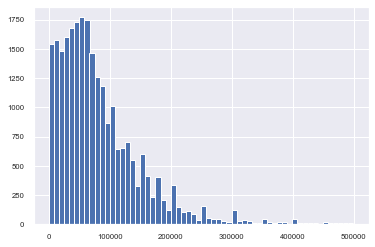

In [876]:
wdf[wdf.Annual_salary < 500000].Annual_salary.hist(bins='scott');

As we can see in the histogram, most values don't go further than 300.000$. Let's start trimming down from 10.000$ till 350.000$.

In [877]:
# Filtra los registros que contienen valores extremos en la columna 'Annual_salary'
lower_limit = 10000 #wdf['Annual_salary'].quantile(0.1)
upper_limit = 350000 #wdf['Annual_salary'].quantile(0.95)
wdf = wdf.loc[wdf['Annual_salary'].between(lower_limit, upper_limit)]

# Restablece el índice del DataFrame después de eliminar los registros
wdf = wdf.reset_index(drop=True)
print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")

Lower Limit: 10000.00, Upper Limit: 350000.00


In [878]:
wdf['Annual_salary'].shape[0]

23375

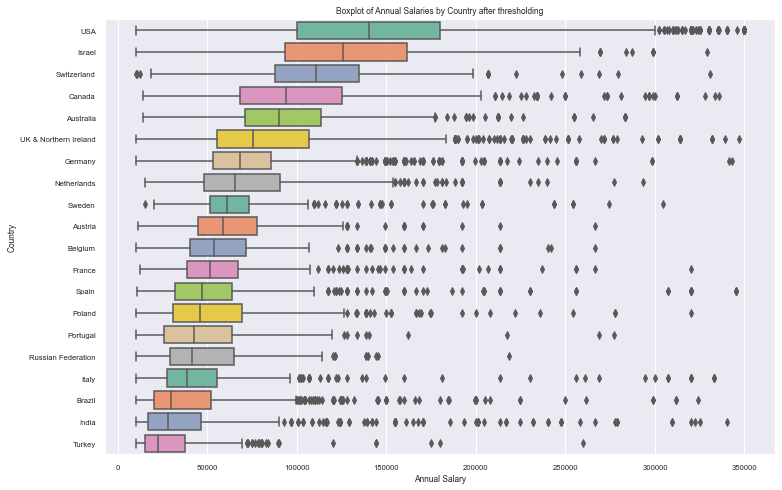

In [879]:
# Get the top 20 countries by frequency
top_20_countries2 = wdf['Country'].value_counts().head(20).index

# Filter the dataset to include only the top 20 countries
filtered_wdf = wdf[wdf['Country'].isin(top_20_countries2)]

# Get the number of cases per country
country_counts = filtered_wdf.groupby('Country')['Annual_salary'].count().reset_index()
country_counts.columns = ['Country', 'Number of cases']

# Merge the number of cases with the filtered_wdf2 dataset
filtered_wdf2 = pd.merge(filtered_wdf, country_counts, on='Country')

# Sort the dataset by the number of values per country
sorted_countries2 = filtered_wdf2.groupby('Country')['Annual_salary'].median().sort_values(ascending=False).index

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Annual_salary', y='Country', data=filtered_wdf, palette='Set2', ax=ax, order=sorted_countries2)
plt.title('Boxplot of Annual Salaries by Country after thresholding')
plt.xlabel('Annual Salary')
plt.ylabel('Country');

Despite salaries now have a normal distribution after applying some scalation, we still see a lot of multivariate outliers on each Country salary distribution.
One of the more robust methods to identify outliers, is the MAD. Hence, we will make a formula to identify the outliers per country and delete them using this method

In [880]:
# Calcular la mediana y el MAD por país
medians_and_mads = wdf.groupby('Country')['Annual_salary'].agg(['median', lambda x: np.median(np.abs(x - x.median()))]).reset_index()
medians_and_mads.columns = ['Country', 'Country_median', 'Country_mad']
# Agregar la mediana y el MAD de cada país al conjunto de datos original
wdf_with_medians_and_mads = pd.merge(wdf, medians_and_mads, on='Country')
wdf_with_medians_and_mads.Annual_salary.isnull().sum()

0

In [881]:
C = 2
scaled_country_mad = 1.4826 * wdf_with_medians_and_mads['Country_mad']
lower_limit = wdf_with_medians_and_mads['Country_median'] - C * scaled_country_mad
upper_limit = wdf_with_medians_and_mads['Country_median'] + C * scaled_country_mad

cleaned_wdf = wdf_with_medians_and_mads[(wdf_with_medians_and_mads['Annual_salary'] >= lower_limit) & (wdf_with_medians_and_mads['Annual_salary'] <= upper_limit)]


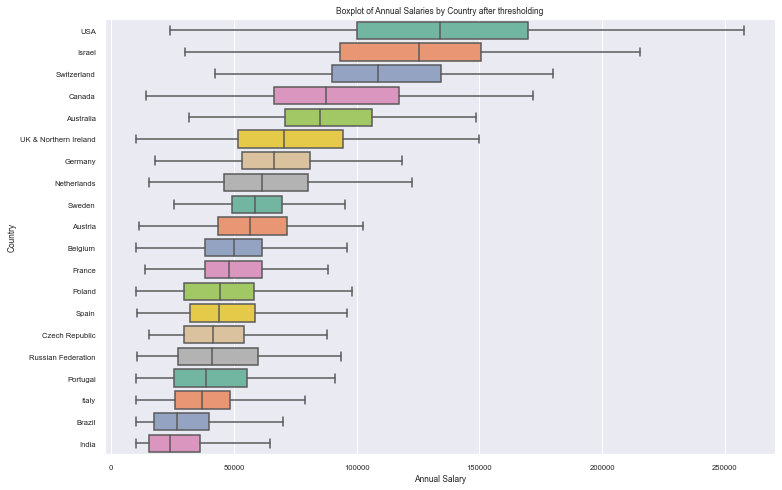

In [882]:
# Get the top 20 countries by frequency
top_20_countries2 = cleaned_wdf['Country'].value_counts().head(20).index

# Filter the dataset to include only the top 20 countries
filtered_wdf = cleaned_wdf[cleaned_wdf['Country'].isin(top_20_countries2)]

# Get the number of cases per country
country_counts = filtered_wdf.groupby('Country')['Annual_salary'].count().reset_index()
country_counts.columns = ['Country', 'Number of cases']

# Merge the number of cases with the filtered_wdf2 dataset
filtered_wdf2 = pd.merge(filtered_wdf, country_counts, on='Country')

# Sort the dataset by the number of values per country
sorted_countries2 = filtered_wdf2.groupby('Country')['Annual_salary'].median().sort_values(ascending=False).index

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Annual_salary', y='Country', data=filtered_wdf, palette='Set2', ax=ax, order=sorted_countries2)
plt.title('Boxplot of Annual Salaries by Country after thresholding')
plt.xlabel('Annual Salary')
plt.ylabel('Country');

In [883]:
cleaned_wdf.shape, wdf.shape

((21053, 19), (23375, 17))

In [884]:
wdf = cleaned_wdf
wdf.drop(['Country_median', 'Country_mad'], axis=1, inplace=True)
wdf.head()

C:\Users\fenan\AppData\Local\Temp\ipykernel_24460\841836538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf.drop(['Country_median', 'Country_mad'], axis=1, inplace=True)


,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Bisexual,White / European,no,Various_disabilities,NaN,5,40205.0
1,Full-time employed,hybrid,no,Bachelor's degree,no,"Developer, full-stack;Developer, back-end",M,UK & Northern Ireland,18-24 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,2,60307.0
2,Full-time employed,remote,no,Bachelor's degree,no,"Developer, full-stack",S,UK & Northern Ireland,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,7.0,7,69102.0
3,Full-time employed,hybrid,yes,Post grad,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,3,52769.0
4,Full-time employed,remote,yes,Bachelor's degree,no,"Developer, back-end;Student;DevOps specialist;...",XS,UK & Northern Ireland,25-34 years old,Prefer not to say,Prefer not to say,Prefer not to say / I don't know,Prefer not to say,Various_disabilities,4.0,4,47743.0


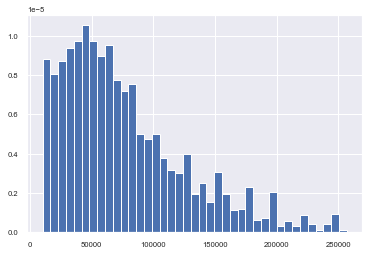

In [885]:
wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary.hist(bins='scott', density=True);

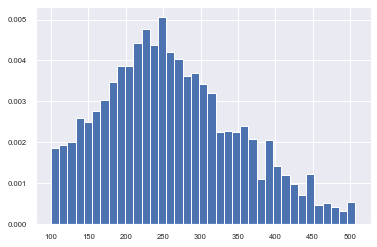

In [886]:
np.sqrt(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary).hist(bins='scott', density=True);

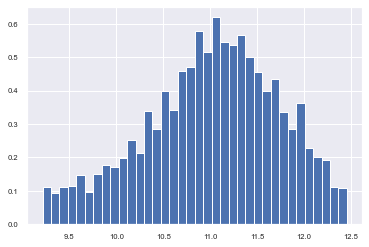

In [887]:
np.log(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary).hist(bins='scott', density=True);

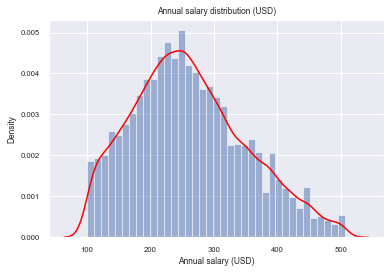

In [888]:
salaries = np.sqrt(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary)

fig, ax = plt.subplots()

sns.kdeplot(salaries, ax=ax, fill=False, color='red')
salaries.hist(ax=ax, bins='scott', alpha=0.5, density=True)

plt.xlabel('Annual salary (USD)')
plt.ylabel('Density')
plt.title('Annual salary distribution (USD)')

plt.show()

- Job Title

In [889]:
# Let's see the unique values of the 'Job_title' column
devs_list = []

# Itera sobre cada valor en la columna 'DevType'
for dev_type in wdf['Job_title']:
    # Si el valor actual no es nulo
    if not pd.isnull(dev_type):
        # Itera sobre cada subvalor del valor actual de 'DevType'
        for dev_sub_type in dev_type.split(';'):
            # Si el subvalor actual no está en devs_list y no contiene 'Other (please specify):', lo agrega
            if dev_sub_type.strip() not in devs_list and 'Other (please specify):' not in dev_sub_type:
                devs_list.append(dev_sub_type.strip())

devs_list

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, back-end',
 'Scientist',
 'Student',
 'DevOps specialist',
 'Project manager',
 'System administrator',
 'Cloud infrastructure engineer',
 'Database administrator',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Educator',
 'Developer, embedded applications or devices',
 'Developer, QA or test',
 'Engineering manager',
 'Product manager',
 'Designer',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, game or graphics',
 'Security professional',
 'Data or business analyst',
 'Blockchain',
 'Academic researcher',
 'Marketing or sales professional']

In [890]:
# Let's keep the rows with AI/ML related fields

AI_ML_devs = ['Data scientist or machine learning specialist',
 'Engineer, data',
 'Data or business analyst',
 'Scientist']

def check_AI_ML_dev(row):
    if pd.isna(row['Job_title']) or row['Job_title'] == '':
        return False
    dev_types = row['Job_title'].split(';')
    for dev in AI_ML_devs:
        if dev in dev_types:
            return True
    return False

# Filtrar el DataFrame eliminando las filas donde check_AI_ML_dev es False
wdf = wdf[wdf.apply(check_AI_ML_dev, axis=1)]

wdf['DevType_len'] = wdf['Job_title'].apply(lambda x: len(x.split(';')))
wdf = wdf.loc[wdf['DevType_len'] <= 4]
wdf = wdf.drop('DevType_len', axis=1)

# Let's see how many rows we have left
print(wdf.shape[0])

1969


C:\Users\fenan\AppData\Local\Temp\ipykernel_24460\1041447339.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf['DevType_len'] = wdf['Job_title'].apply(lambda x: len(x.split(';')))


In [891]:
wdf.Job_title.nunique()

561

We apply the following function to standardize and clean the "Job_title" column in the dataset. The function splits job titles, removes extra spaces, creates a list of unique titles, sorts them alphabetically, and then joins them back together with a consistent delimiter. By doing this, we ensure that the model treats job titles consistently, regardless of the order they appear in, which can lead to more accurate predictions. Also, it will 'Other (please specify):' from the options of Job titles


In [892]:
def clean_job_titles(job_title):
    job_list = job_title.split(';')
    job_list = [job.strip() for job in job_list]
    job_list = [job for job in job_list if job != 'Other (please specify):']
    unique_jobs = list(set(job_list))
    sorted_jobs = sorted(unique_jobs)
    return ';'.join(sorted_jobs)

wdf['Cleaned_Job_title'] = wdf['Job_title'].apply(clean_job_titles)
# Imprime las columnas 'Job_title' y 'Cleaned_Job_title' lado a lado
wdf[['Job_title', 'Cleaned_Job_title']].sample(20)


,Job_title,Cleaned_Job_title
7224,Data scientist or machine learning specialist;...,Academic researcher;Data scientist or machine ...
10038,Data scientist or machine learning specialist;...,Data scientist or machine learning specialist;...
7131,"Developer, desktop or enterprise applications;...","Data or business analyst;Developer, desktop or..."
7907,"Engineer, data","Engineer, data"
21001,"Engineer, data;Data or business analyst","Data or business analyst;Engineer, data"
5350,"Developer, desktop or enterprise applications;...","Data or business analyst;Developer, desktop or..."
6302,Data scientist or machine learning specialist;...,Data or business analyst;Data scientist or mac...
10572,Database administrator;Data or business analyst,Data or business analyst;Database administrator
13429,Academic researcher;Scientist,Academic researcher;Scientist
8323,"Engineer, data;Developer, embedded application...","Developer, embedded applications or devices;En..."


In [893]:
# Actualizar la columna 'Job_title' con los valores de 'Cleaned_Job_title'
wdf['Job_title'] = wdf['Cleaned_Job_title']

# Eliminar la columna 'Cleaned_Job_title' del DataFrame
wdf.drop(columns=['Cleaned_Job_title'], inplace=True)

# Obtener todos los títulos de trabajo únicos
unique_job_titles = list(set(wdf['Job_title'].str.split(';', expand=True).stack()))

# Contar la cantidad de títulos de trabajo únicos
unique_job_titles_count = len(unique_job_titles)

# Imprimir la cantidad de títulos de trabajo únicos
print(unique_job_titles_count)
print(unique_job_titles)



28
['Senior Executive (C-Suite, VP, etc.)', 'Data or business analyst', 'Developer, full-stack', 'Scientist', 'Developer, QA or test', 'Educator', 'Engineer, data', 'Marketing or sales professional', 'Project manager', 'Security professional', 'Engineer, site reliability', 'Developer, desktop or enterprise applications', 'Developer, back-end', 'Blockchain', 'Designer', 'Student', 'Product manager', 'Developer, embedded applications or devices', 'DevOps specialist', 'Developer, game or graphics', 'Developer, mobile', 'Academic researcher', 'Database administrator', 'Cloud infrastructure engineer', 'System administrator', 'Developer, front-end', 'Engineering manager', 'Data scientist or machine learning specialist']


In [894]:
# Separa los títulos de trabajo y aplica one-hot encoding
job_title_dummies = wdf['Job_title'].str.get_dummies(sep=';')

# Une el DataFrame original (wdf) con el nuevo DataFrame (job_title_dummies)
wdf_extended = pd.concat([wdf, job_title_dummies], axis=1)

# Muestra las primeras filas del nuevo DataFrame
wdf_extended.head()


,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,...,"Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,...,1,0,0,0,0,0,0,0,0,0
3,Full-time employed,hybrid,yes,Post grad,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,1,0,0,0,0
62,Full-time employed,remote,yes,Post grad,no,Scientist,XS,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,1,0,0,0,0
73,Full-time employed,hybrid,yes,Post grad,yes,Data scientist or machine learning specialist;...,M,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,0,0,0,0,0
78,Full-time employed,remote,yes,Less than a Bachelor's,no,"Developer, back-end;Engineer, data",M,UK & Northern Ireland,45-54 years old,Man,...,0,0,0,0,0,0,0,0,0,0


In [895]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score

# Asumiendo que df_encoded es el DataFrame después de aplicar one-hot encoding
columnas = job_title_dummies.columns

# Crear una matriz vacía de similitud
similitud_jaccard = np.zeros((len(columnas), len(columnas)))

# Calcular la correlación de Jaccard entre cada par de columnas
for i in range(len(columnas)):
    for j in range(len(columnas)):
        similitud_jaccard[i, j] = jaccard_score(job_title_dummies[columnas[i]], job_title_dummies[columnas[j]])

# Convertir la matriz de similitud en un DataFrame
df_similitud_jaccard = pd.DataFrame(similitud_jaccard, index=columnas, columns=columnas)


In [896]:
df_similitud_jaccard

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end",...,"Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Academic researcher,1.000000,0.015038,0.019444,0.028015,0.127820,0.005168,0.010417,0.000000,0.003534,0.041505,...,0.007117,0.000000,0.000000,0.006873,0.024922,0.419903,0.014760,0.011111,0.040892,0.033223
Blockchain,0.015038,1.000000,0.000000,0.008375,0.004975,0.000000,0.000000,0.000000,0.000000,0.012635,...,0.000000,0.000000,0.000000,0.000000,0.011628,0.014793,0.000000,0.000000,0.000000,0.014706
Cloud infrastructure engineer,0.019444,0.000000,1.000000,0.034024,0.042627,0.038298,0.000000,0.107784,0.000000,0.087603,...,0.029851,0.013986,0.000000,0.027778,0.005464,0.006865,0.007752,0.007874,0.007463,0.012195
Data or business analyst,0.028015,0.008375,0.034024,1.000000,0.117219,0.121306,0.022989,0.035994,0.024958,0.128231,...,0.003263,0.004847,0.011804,0.031353,0.066129,0.025727,0.004967,0.016807,0.006579,0.032103
Data scientist or machine learning specialist,0.127820,0.004975,0.042627,0.117219,1.000000,0.027716,0.010976,0.030879,0.009828,0.126891,...,0.007362,0.017199,0.004988,0.013415,0.026036,0.098826,0.009938,0.003713,0.013631,0.011919
Database administrator,0.005168,0.000000,0.038298,0.121306,0.027716,1.000000,0.030675,0.061538,0.012579,0.067504,...,0.006289,0.006024,0.000000,0.005917,0.030000,0.000000,0.000000,0.013514,0.000000,0.068182
Designer,0.010417,0.000000,0.000000,0.022989,0.010976,0.030675,1.000000,0.009259,0.000000,0.010417,...,0.033333,0.014706,0.021739,0.028571,0.028571,0.016760,0.000000,0.000000,0.000000,0.022727
DevOps specialist,0.000000,0.000000,0.107784,0.035994,0.030879,0.061538,0.009259,1.000000,0.040816,0.059727,...,0.010000,0.009346,0.000000,0.000000,0.006849,0.012563,0.010870,0.000000,0.000000,0.032000
"Developer, QA or test",0.003534,0.000000,0.000000,0.024958,0.009828,0.012579,0.000000,0.040816,1.000000,0.015901,...,0.000000,0.000000,0.025641,0.031746,0.010000,0.011331,0.000000,0.000000,0.000000,0.012195
"Developer, back-end",0.041505,0.012635,0.087603,0.128231,0.126891,0.067504,0.010417,0.059727,0.015901,1.000000,...,0.015929,0.017513,0.001792,0.008636,0.021417,0.064399,0.008913,0.001776,0.003515,0.018613


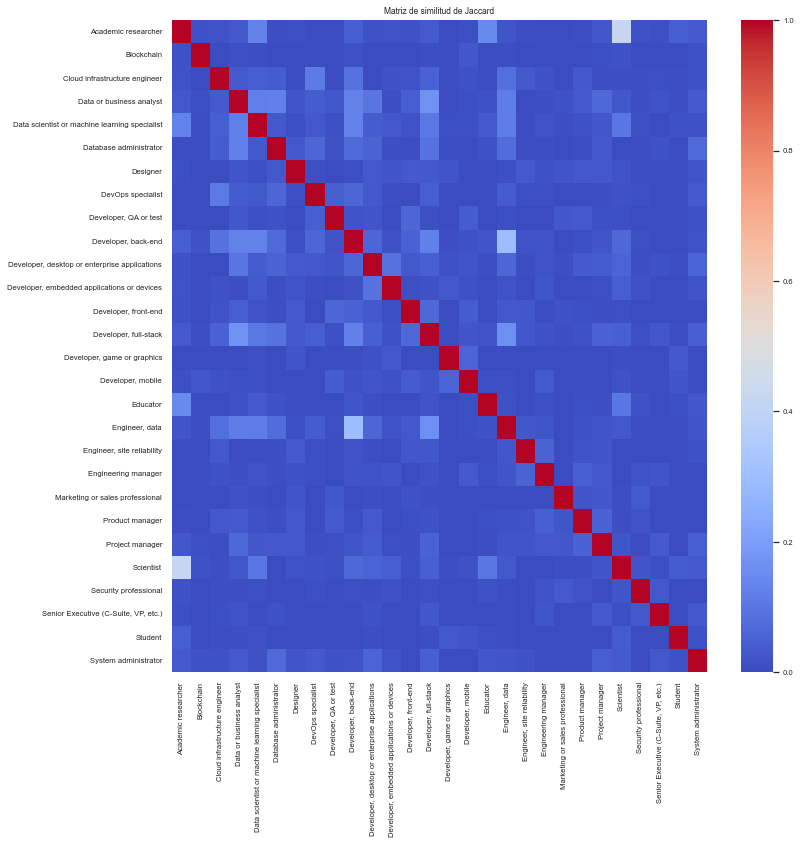

In [897]:
# Asumiendo que df_similitud_jaccard es el DataFrame que contiene la matriz de similitud de Jaccard
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura (ancho, alto) en pulgadas
sns.heatmap(df_similitud_jaccard, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matriz de similitud de Jaccard")
plt.show()


In [898]:
# Another similar approach: Splitting Job_Title using CountVectorizer
'''import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Suponiendo que tu DataFrame se llama wdf y tiene una columna llamada 'Job_title'
job_titles = wdf['Job_title']

# Creamos una instancia de CountVectorizer con el patrón de token adecuado para separar los títulos de trabajo
vectorizer = CountVectorizer(token_pattern=r'[^;]+')

# Ajustamos y transformamos la columna 'Job_title'
job_title_vectors = vectorizer.fit_transform(job_titles)

# Muestra el vocabulario
print(vectorizer.vocabulary_)'''

"import pandas as pd\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# Suponiendo que tu DataFrame se llama wdf y tiene una columna llamada 'Job_title'\njob_titles = wdf['Job_title']\n\n# Creamos una instancia de CountVectorizer con el patrón de token adecuado para separar los títulos de trabajo\nvectorizer = CountVectorizer(token_pattern=r'[^;]+')\n\n# Ajustamos y transformamos la columna 'Job_title'\njob_title_vectors = vectorizer.fit_transform(job_titles)\n\n# Muestra el vocabulario\nprint(vectorizer.vocabulary_)"

In [899]:
'''job_title_vectors'''

'job_title_vectors'

### Missing values

In [900]:
wdf_extended.isna().sum() # The 868 missing values in the 'Experience' account for 30% of data, we should impute them

Job_type                                           0
Remote_work                                        0
Coding_as_hobby                                    0
Education                                          0
Certifications                                     0
Job_title                                          0
Company_size                                      33
Country                                            0
Age                                                7
Gender                                            12
Sexual_orientation                                68
Ethnicity                                         33
Physical_disability                                0
Mental_disability                                  0
Work_experience                                  578
Coding_experience                                  8
Annual_salary                                      0
Academic researcher                                0
Blockchain                                    

Imputation strategies for each column with missing values:

1. **Company_size (47 missing values):**

Since Company_size is a categorical variable and has a relatively small number of missing values, you can use the mode (the most common value) to impute the missing values.




In [901]:
wdf_extended['Company_size'].fillna(wdf_extended['Company_size'].mode()[0], inplace=True)

In [902]:
# You could also use the following code to impute the missing values but there is no mode for all the combinations of Job_title and Country

# wdf_extended['Company_size'] = wdf_extended.groupby(['Job_title', 'Country'])['Company_size'].apply(lambda x: x.fillna(x.mode().iloc[0]))

2. **Age (9 missing values):** 

`Age` have only 9 missing values, so we will drop them.

In [903]:
# we will drop the rows with missing values in the 'Age' column

wdf_extended.dropna(subset=['Age'], inplace=True)

3. **Coding Experience (9 missing values):** 

It also has only 9 missing values, so same process as `Age`

In [904]:
wdf_extended.isnull().sum()

Job_type                                           0
Remote_work                                        0
Coding_as_hobby                                    0
Education                                          0
Certifications                                     0
Job_title                                          0
Company_size                                       0
Country                                            0
Age                                                0
Gender                                             7
Sexual_orientation                                63
Ethnicity                                         28
Physical_disability                                0
Mental_disability                                  0
Work_experience                                  574
Coding_experience                                  8
Annual_salary                                      0
Academic researcher                                0
Blockchain                                    

In [905]:
# we will drop the rows with missing values in the 'Coding_experience' column

wdf_extended.dropna(subset=['Coding_experience'], inplace=True)

In [906]:
wdf_extended.Coding_experience.unique()

array(['5', '3', 'Less than 1 year', '6', '26', '15', '9', '28', '10',
       '2', '1', '4', '24', '30', '12', '25', '17', '8', '35', '14', '11',
       '7', '20', '40', '16', '19', '38', '18', '13', '31', '27', '22',
       '37', '21', '23', '41', '46', '34', '32', '42', '50', '45', '36',
       '29', 'More than 50 years', '33', '48', '43'], dtype=object)

In [907]:
wdf_extended['Coding_experience'] = pd.to_numeric(wdf_extended['Coding_experience'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}), errors='coerce')
wdf_extended.Coding_experience.unique()

array([ 5. ,  3. ,  0.5,  6. , 26. , 15. ,  9. , 28. , 10. ,  2. ,  1. ,
        4. , 24. , 30. , 12. , 25. , 17. ,  8. , 35. , 14. , 11. ,  7. ,
       20. , 40. , 16. , 19. , 38. , 18. , 13. , 31. , 27. , 22. , 37. ,
       21. , 23. , 41. , 46. , 34. , 32. , 42. , 50. , 45. , 36. , 29. ,
       51. , 33. , 48. , 43. ])

3. **Gender (16 missing values):** 

`Gender` is a categorical variable, and you can use the mode grouped by `Job_title` or `Country`, assuming that these features may have an influence on the gender.



In [908]:
wdf_extended['Gender'] = wdf_extended.groupby('Country')['Gender'].apply(lambda x: x.fillna(x.mode().iloc[0])) # with Job_title and Country there's no mode

4. **Sexual_orientation (101 missing values):** 

Since `Sexual_orientation` is a categorical variable and has a significant number of missing values, you can create a new category called "Unknown" to represent the missing values.



In [909]:
wdf_extended['Sexual_orientation'].fillna('Unknown', inplace=True)
wdf_extended['Sexual_orientation'].unique()

array(['Bisexual', 'Straight / Heterosexual', 'Prefer not to say',
       'Unknown', 'Gay or Lesbian', 'Queer'], dtype=object)

5. **Ethnicity (44 missing values):** 

`Ethnicity` is a categorical variable, and you can use the mode grouped by `Country`, assuming that the country of origin may have an influence on the ethnicity.


In [910]:
wdf_extended['Ethnicity'] = wdf_extended.groupby('Country')['Ethnicity'].apply(lambda x: x.fillna(x.mode().iloc[0]))


6. **Experience (868 missing values):** 

Since `Experience` is a numeric variable and has a significant number of missing values (1/3 of the total rows), I recommend using a more advanced approach like KNN Imputer. KNN Imputer uses the k-nearest neighbors to estimate the missing values.

In [911]:
wdf_before_kNNImputer = wdf_extended.copy()

In [912]:
wdf_before_kNNImputer.shape

(1954, 45)

In [913]:
wdf_before_kNNImputer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 23369
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Job_type                                       1954 non-null   object 
 1   Remote_work                                    1954 non-null   object 
 2   Coding_as_hobby                                1954 non-null   object 
 3   Education                                      1954 non-null   object 
 4   Certifications                                 1954 non-null   object 
 5   Job_title                                      1954 non-null   object 
 6   Company_size                                   1954 non-null   object 
 7   Country                                        1954 non-null   object 
 8   Age                                            1954 non-null   object 
 9   Gender                                         1954

In [914]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

# Definir las columnas ordinales y el orden
ordinal_columns = ['Education', 'Company_size', 'Age', 'Coding_as_hobby', 'Certifications']
ordinal_categories = [
    ['Less than a Bachelor\'s', 'Bachelor\'s degree', 'Master\'s degree', 'Post grad'],
    ['XS', 'S', 'M', 'L', 'XL'],
    ['Prefer not to say','Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'],
    ['no', 'yes'],
    ['no', 'yes']
]

# Definir las columnas one-hot
onehot_columns = ['Job_type', 'Remote_work', 'Gender', 'Sexual_orientation', 'Ethnicity', 'Physical_disability', 'Mental_disability']

# Crear las transformaciones
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_transformer = OneHotEncoder(sparse=False)

# Ajustar y transformar las columnas ordinales
wdf_extended_ordinal_transformed = ordinal_transformer.fit_transform(wdf_extended[ordinal_columns])

# Ajustar y transformar las columnas one-hot
wdf_extended_onehot_transformed = onehot_transformer.fit_transform(wdf_extended[onehot_columns])

# Concatenar las columnas transformadas
wdf_extended_transformed = np.hstack([wdf_extended_ordinal_transformed, wdf_extended_onehot_transformed])

# Crear un KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes en la columna 'Experience' utilizando las características transformadas
experience_transformed = knn_imputer.fit_transform(np.hstack([wdf_extended_transformed, wdf_extended['Work_experience'].values.reshape(-1, 1)]))

# Redondear los valores imputados a 1 decimal
experience_imputed_rounded = np.round(experience_transformed[:, -1], 1)

# Reemplazar la columna 'Experience' con los valores imputados redondeados
wdf_extended['Work_experience'] = experience_imputed_rounded

# Revertir las transformaciones aplicadas a las columnas one-hot y reemplazar los valores en el DataFrame original
wdf_extended.loc[:, onehot_columns] = onehot_transformer.inverse_transform(wdf_extended_onehot_transformed)

#wdf_extended.reset_index(drop=True, inplace=True)

# Corregir la comparación
comparison = pd.DataFrame({'Original': wdf_before_kNNImputer['Work_experience'], 'Imputed': wdf_extended['Work_experience']})
comparison['Difference'] = comparison.apply(lambda row: pd.isna(row['Original']) and not pd.isna(row['Imputed']), axis=1)

imputed_values = comparison[comparison['Difference']]

num_imputed_values = len(imputed_values)
unique_imputed_values = imputed_values['Imputed'].nunique()

print(f"Number of imputed values: {num_imputed_values}")
print(f"Number of unique imputed values: {unique_imputed_values}")

Number of imputed values: 571
Number of unique imputed values: 132


In [915]:
# Makes sense?:
wdf_extended.loc[imputed_values.index, ['Age','Work_experience']].sample(20)

,Age,Work_experience
95,25-34 years old,7.4
20872,25-34 years old,6.6
8627,25-34 years old,4.2
3351,45-54 years old,19.2
600,25-34 years old,6.0
9288,25-34 years old,5.0
19558,35-44 years old,11.2
17422,25-34 years old,5.6
12504,18-24 years old,3.6
9414,25-34 years old,6.0


In [916]:
wdf_extended.isna().any().sum()

0

In [917]:
wdf_extended.Annual_salary.info()

<class 'pandas.core.series.Series'>
Int64Index: 1954 entries, 0 to 23369
Series name: Annual_salary
Non-Null Count  Dtype  
--------------  -----  
1954 non-null   float64
dtypes: float64(1)
memory usage: 95.1 KB


### To see how the encoded dataset looks like

In [918]:
# Crear un DataFrame para las columnas ordinales transformadas
wdf_extended_ordinal_transformed_df = pd.DataFrame(wdf_extended_ordinal_transformed, columns=ordinal_columns)

# Obtener los nombres de las nuevas columnas generadas por el OneHotEncoder
onehot_transformer_columns = onehot_transformer.get_feature_names_out(onehot_columns)

# Crear un DataFrame para las columnas one-hot transformadas
wdf_extended_onehot_transformed_df = pd.DataFrame(wdf_extended_onehot_transformed, columns=onehot_transformer_columns)

# Restablecer los índices de todos los DataFrames
wdf_extended_ordinal_transformed_df.reset_index(drop=True, inplace=True)
wdf_extended_onehot_transformed_df.reset_index(drop=True, inplace=True)
wdf_extended['Work_experience'].reset_index(drop=True, inplace=True)
wdf_extended['Coding_experience'].reset_index(drop=True, inplace=True)
wdf_extended['Country'].reset_index(drop=True, inplace=True)

# Añadir la siguiente línea después de restablecer los índices de todos los DataFrames
wdf_extended['Annual_salary'].reset_index(drop=True, inplace=True)
job_title_dummies.reset_index(drop=True, inplace=True)

# Concatenar los DataFrames transformados y la columna 'Experience'
wdf_extended_full_encoded = pd.concat([wdf_extended_ordinal_transformed_df, wdf_extended_onehot_transformed_df, job_title_dummies, 
                                           wdf_extended['Work_experience'],wdf_extended['Coding_experience'],
                                           wdf_extended['Annual_salary'], wdf_extended['Country']], axis=1)

# Job_title_dummies has 22 rows more, consequently, some NANs were generated. Let's drop all NAN rows:

wdf_extended_full_encoded.dropna(inplace=True)

# Verificar la forma del DataFrame transformado completo
print(wdf_extended_full_encoded.shape)

(1954, 76)


In [919]:
wdf_before_kNNImputer.Coding_experience.head()

0      5.0
3      3.0
62     0.5
73     6.0
78    26.0
Name: Coding_experience, dtype: float64

In [920]:
wdf_extended_full_encoded.Coding_experience.head()

0     5.0
1     3.0
2     0.5
3     6.0
4    26.0
Name: Coding_experience, dtype: float64

## Save the model

In [921]:
wdf_extended_full_encoded.isnull().sum()

Education               0
Company_size            0
Age                     0
Coding_as_hobby         0
Certifications          0
                       ..
System administrator    0
Work_experience         0
Coding_experience       0
Annual_salary           0
Country                 0
Length: 76, dtype: int64

In [922]:
import os

# ...

clean_and_encoded_df = wdf_extended_full_encoded.copy()
clean_and_encoded_df.to_csv('clean_train_df.csv', index=False)

# Guardar en la carpeta Baseline_Models
baseline_models_path = os.path.join('..', 'Baseline_Models', 'clean_train_df.csv')
clean_and_encoded_df.to_csv(baseline_models_path, index=False)


In [923]:
pd.read_csv('clean_train_df.csv').sample(10)

,Education,Company_size,Age,Coding_as_hobby,Certifications,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Remote_work_hybrid,...,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Coding_experience,Annual_salary,Country
463,2.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,5.0,5.0,215000.0,USA
1411,1.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,4.0,5.0,15477.0,India
1506,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,10.0,10.0,12648.0,Mexico
1697,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,6.2,4.0,88464.0,Australia
39,3.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,12.0,14.0,61563.0,UK & Northern Ireland
1902,1.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,8.2,2.0,16863.0,Malaysia
1914,1.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,5.4,0.5,32964.0,Qatar
1639,3.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,6.0,6.0,94644.0,Denmark
1227,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,4.0,4.0,14208.0,Brazil
509,2.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,2.0,2.0,100000.0,USA


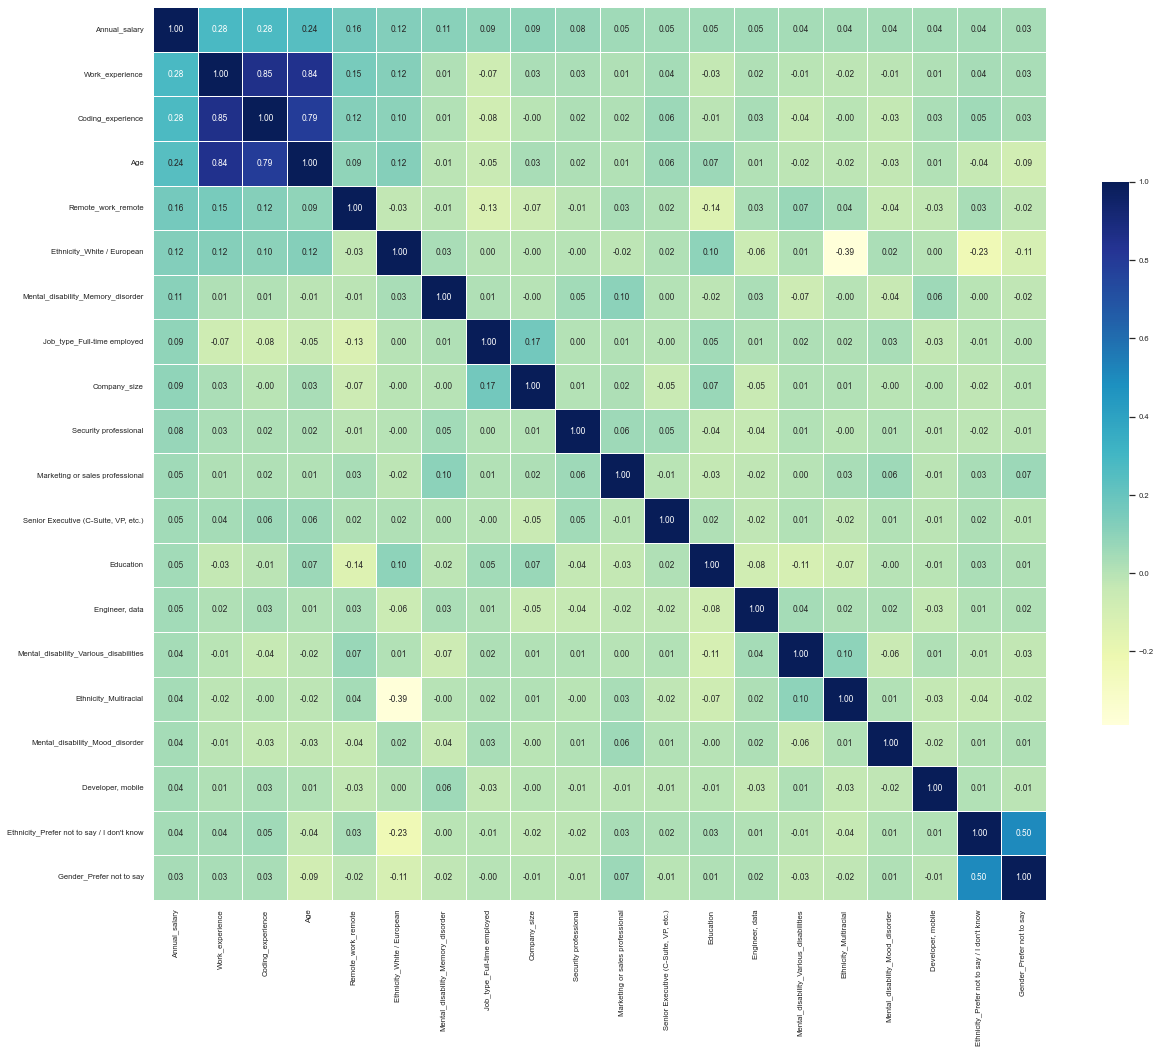

In [924]:
# Calculate the correlation matrix
corr_matrix = wdf_extended_full_encoded.corr()

# Set the threshold for selecting the top n features
n = 20

# Select the top n most correlated features
top_corr_features = corr_matrix.nlargest(n, 'Annual_salary')['Annual_salary'].index

# Calculate the correlation matrix for the top n features
top_corr_matrix = wdf_extended_full_encoded[top_corr_features].corr()

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(top_corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [925]:
pd.read_csv('clean_train_df.csv').shape

(1954, 76)

### Recovering previous dataset for some plotting


One-hot encoding can be used to handle categorical features, but it can make the data too complex to analyze. One-hot encoding creates multiple binary features for each possible option in a categorical feature. This can lead to a high number of features, making it difficult to interpret the data. Therefore, another method is needed to gain insights from the data.

Let's recover the clean dataset of before encoding. We can calculate Cramer's V correlation, which allows us to guess correlation among categroical features

- We don't need the already encoded Job_titles
- We do need the original Job_title column though

## PLOT IDEAS:
BOXPLOTS: 

- _Boxplots of salaries as a funcion of experience years_(Martin2018)
- _Boxplots of salaries as a funcion of education_ (Martin2018)